https://filterpy.readthedocs.io/en/latest/kalman/KalmanFilter.html
https://github.com/selfedu-rus/python-algorithms/blob/master/lesson%206.%20filter%20kalman.py

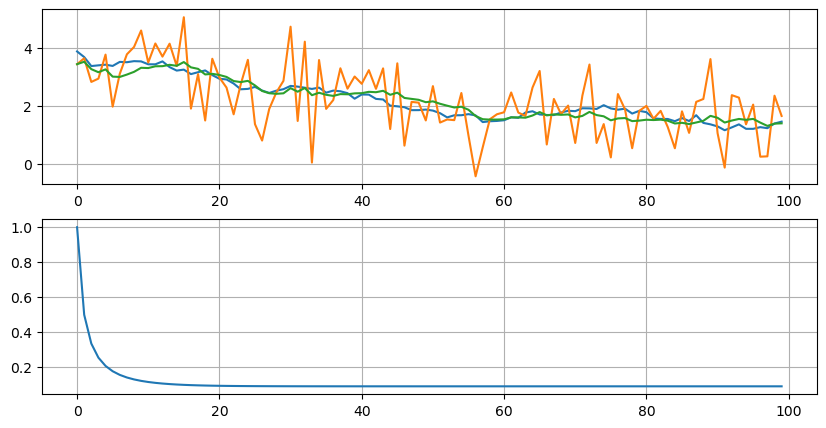

In [18]:
import numpy as np
import matplotlib.pyplot as plt

N = 100         # число наблюдений
dNoise = 1      # дисперсия шума
dSignal = 5     # дисперсия сигнала
r = 0.99        # коэффициент корреляции в модели движения
en = 0.1        # дисперсия СВ в модели движения

x = np.zeros(N)                         # истинные координаты перемещения (пока просто нули)
x[0] = np.random.normal(0, dSignal)     # формирование первой координаты
for i in range(1, N):                   # формирование последующих координат по модели АР
    x[i] = r*x[i-1] + np.random.normal(0, en)

z = x + np.random.normal(0, dNoise, N)  # формирование наблюдений


# фильтрация сигнала с помощью фильтра Калмана
xx = np.zeros(N)    # вектор для хранения оценок перемещений
P = np.zeros(N)     # вектор для хранения дисперсий ошибок оценивания
xx[0] = z[0]        # первая оценка
P[0] = dNoise      # дисперсия первой оценки

# рекуррентное вычисление оценок по фильтру Калмана
for i in range(1, N):
    Pe = r*r*P[i-1]+en*en
    P[i] = (Pe*dNoise)/(Pe+dNoise)
    xx[i] = r*xx[i-1]+P[i]/dNoise*(z[i]-r*xx[i-1])

# отображение результатов
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

ax1.plot(x)
ax1.plot(z)
ax1.plot(xx)
ax1.grid(True)

ax2.plot(P)
ax2.grid(True)
plt.show()

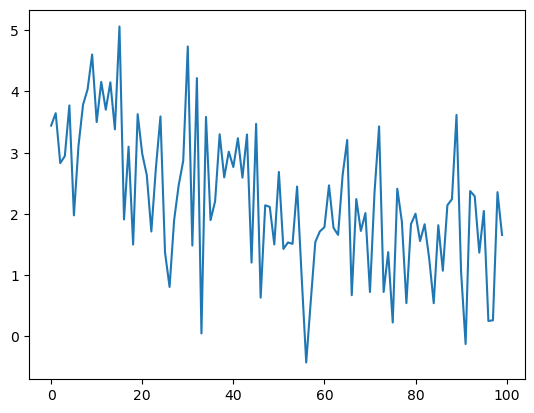

In [20]:
plt.plot(z)

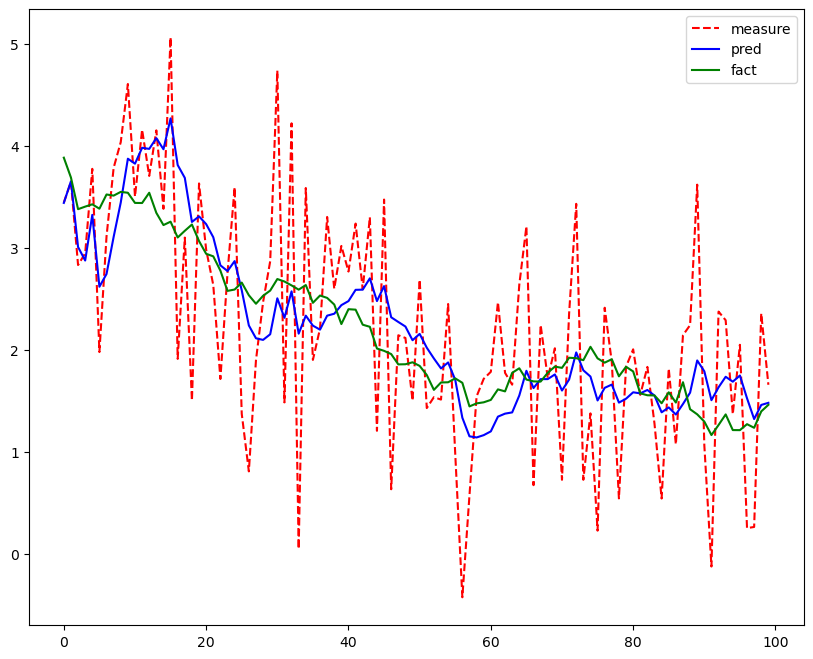

In [60]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import numpy as np

f = KalmanFilter(dim_x=2, dim_z=1)
f.x = np.array([[2.], [0.]])  # initial state
f.F = np.array([[1.,1.], [0.,1.]])  # state transition matrix
f.H = np.array([[1.,0.]])  # measurement function matrix
f.P = np.array([[1000., 0.], [0., 1000.]])  # state covariance matrix
f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.1)  # process noise matrix
f.R = np.array([[5.]])  # measurement noise matrix

preds = []

for measure in z:
    f.predict()
    f.update(measure)
    preds.append(f.x_post[0][0])
    
plt.figure(figsize=(10, 8))
plt.plot(z, 'r--', label='measure')
plt.plot(preds, 'b', label='pred')
plt.plot(x, 'g', label='fact')
plt.legend()
plt.show()